In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [8]:
cereal=cv2.imread("D:\CursoOpenCV\Imagenes\cereal.png")
cereales=cv2.imread("D:\CursoOpenCV\Imagenes\cereales.png")

In [9]:
cereal=cv2.cvtColor(cereal,cv2.COLOR_BGR2RGB)
cereales=cv2.cvtColor(cereales,cv2.COLOR_BGR2RGB)

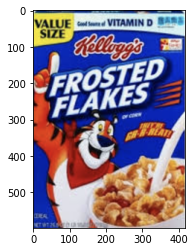

In [10]:
plt.imshow(cereal)

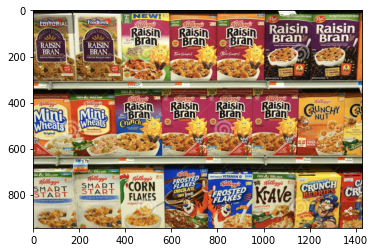

In [11]:
plt.imshow(cereales)

In [12]:
#Extraer las caracteristicas de cada una de la imagenes
#cv2.xfeatures2d.SIFT_create() devuelve una varaible para lasa descripciones de cada imagen
sift=cv2.xfeatures2d.SIFT_create()

In [23]:
#sift.detectAndCompute(cereal,None) devuelve 2 variables con la clave y la descripcion de la imagen
kp1,descripcion1=sift.detectAndCompute(cereal,None)
kp2,descripcion2=sift.detectAndCompute(cereales,None)

In [24]:
#Vamos a emparejar los valores por las caracteristicas 
#Creamos un diccionario con algorithm=0,trees=5
indice=dict(algorithm=0,trees=5)

In [25]:
#Creamos un diccionario con checks=50
busqueda=dict(checks=50)

In [26]:
#Creamos el obj para encontrar el emparejamiento
flan=cv2.FlannBasedMatcher(indice,busqueda)

In [27]:
#Encontramos los emparejamientos 
emparejamientos=flan.knnMatch(descripcion1,descripcion2,k=2)

In [29]:
#Seleccionamos los mejores emparejamientos
mejores=[]
#Recorremos los emparejamientos en un bucle
for e1,e2 in emparejamientos:
    #Si la distancia es menor
    if e1.distance<0.7*e2.distance:
        #Apilamos en la lista
        mejores.append([e1])

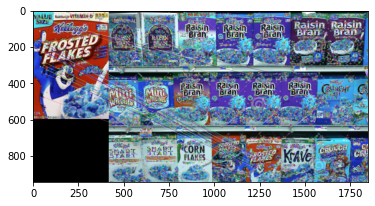

In [30]:
#Vamos a juntar por emparejamiento
#cv2.drawMatchesKnn(cereal,kp1,cereales,kp2,mejores[0:30],None,flags=0) devuelve a las dos imagnes juntas con los emparejamientos
imagenEmparejamiento=cv2.drawMatchesKnn(cereal,kp1,cereales,kp2,mejores[0:30],None,flags=0)
imagenEmparejamiento=cv2.cvtColor(imagenEmparejamiento,cv2.COLOR_BGR2RGB)
plt.imshow(imagenEmparejamiento)

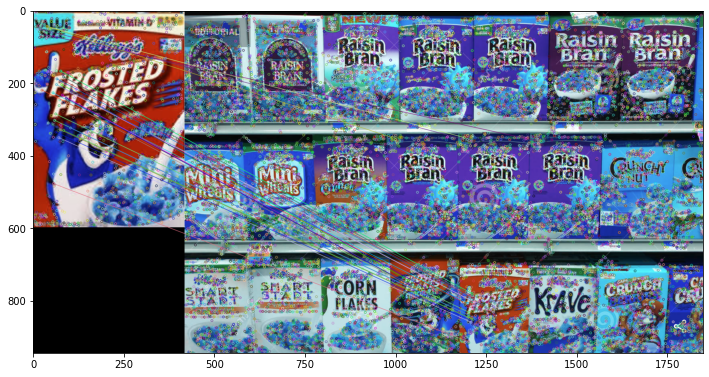

In [31]:
figura=plt.figure(figsize=(12,12))
lienzo=figura.add_subplot(111)
lienzo.imshow(imagenEmparejamiento)